<a href="https://colab.research.google.com/github/AlvaroViamont/Prcatica1git/blob/master/Pokem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Manipulando datos de Pokemon**
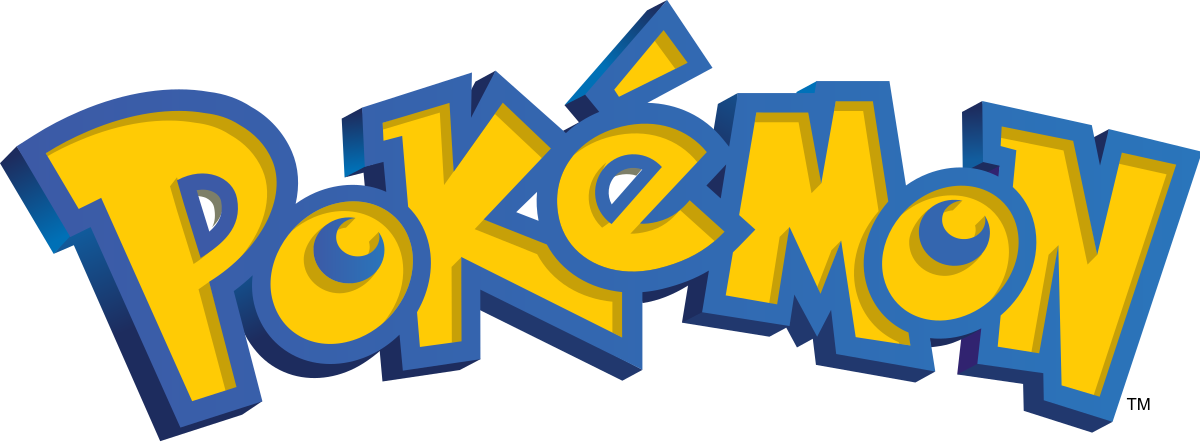

# Librerias

In [87]:
# Análisis y disputa de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Análisis de datos inicial

In [ ]:
pokedex = pd.read_csv("/content/drive/MyDrive/Creando datos con pokemon/pokedex_(Update_04.21).csv", sep=',')
pokedex = pokedex.drop(['Unnamed: 0'], axis=1)

In [ ]:
pokedex.info()

In [ ]:
pokemon.head()

# Analisis Preliminar

In [ ]:
null_filter = pokedex.isna().sum()
missing_values = null_filter.loc[pokedex.isna().sum() != 0].to_frame().copy()
missing_values

In [ ]:
missing_values.columns = ['count']
missing_values['Name'] = missing_values.index
missing_values.reset_index(drop=True, inplace=True)
missing_values

sns.barplot(x='Name', y='count', data=missing_values)
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Perdidos")
plt.xticks(rotation=90)

# Analizando los datos de Pokedex

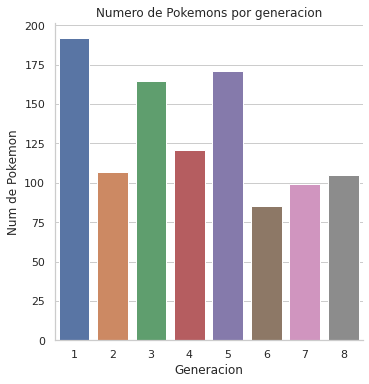

In [51]:
# Pokemons por generacion
ax = sns.catplot(x="generation", kind="count", data=pokedex)
ax.set(xlabel='Generacion', ylabel='Num de Pokemon', title='Numero de Pokemons por generacion')

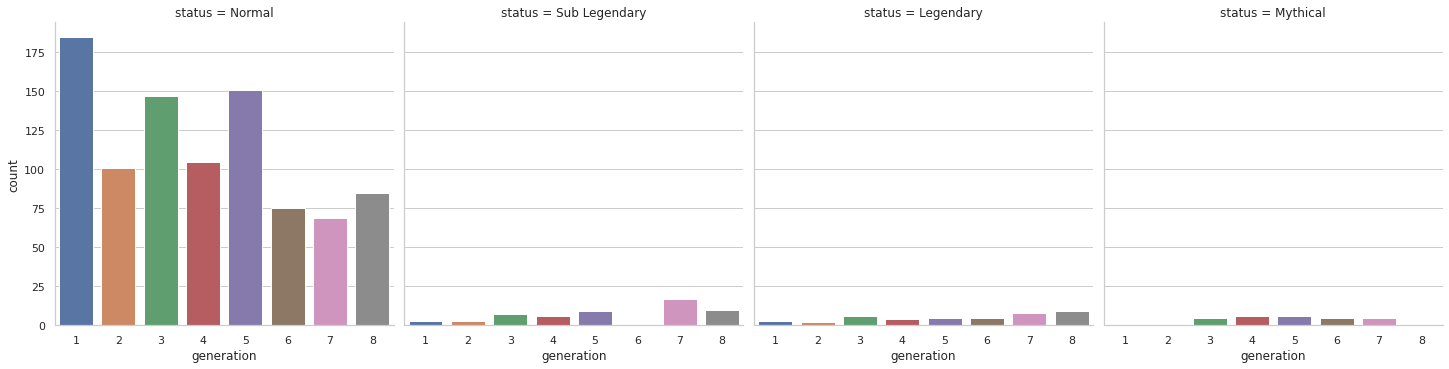

In [52]:
# Conteo de Pokemons por Estatus
sns.catplot(x="generation", col="status", kind="count", data=pokedex)

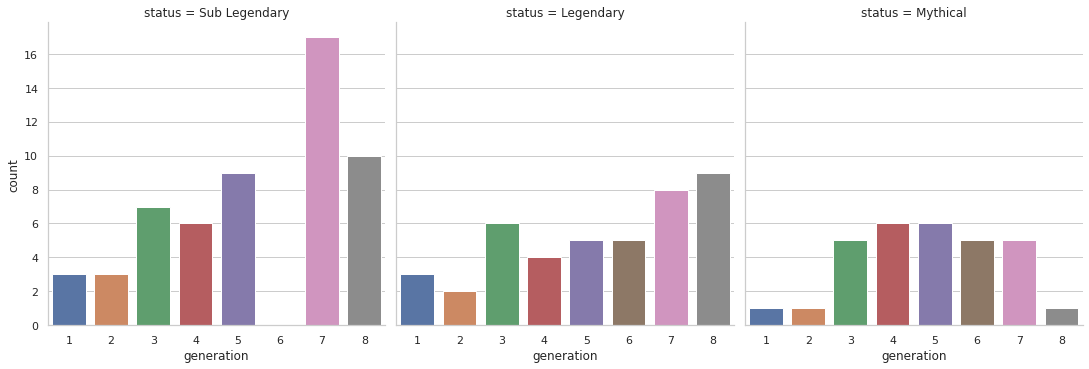

In [53]:
poke_filter = pokedex.loc[pokedex.status != "Normal"]
sns.catplot(x="generation", col="status", kind="count", data=poke_filter);

In [54]:
# Especies de Pokemons
pokedex.species.value_counts()

Mouse Pokémon          12
Fox Pokémon             9
Dragon Pokémon          9
Pumpkin Pokémon         8
Flame Pokémon           7
                       ..
Radome Pokémon          1
Angler Pokémon          1
Sand Heap Pokémon       1
Dream Eater Pokémon     1
Cavern Pokémon          1
Name: species, Length: 652, dtype: int64

In [55]:
pokedex.groupby('generation').species.describe()

,count,unique,top,freq
generation,,,,
1,192,97,Mouse Pokémon,12
2,107,79,Big Jaw Pokémon,3
3,165,121,Weather Pokémon,4
4,121,95,Plasma Pokémon,6
5,171,136,Zen Charm Pokémon,4
6,85,57,Pumpkin Pokémon,8
7,99,72,Prism Pokémon,4
8,105,79,Warrior Pokémon,4


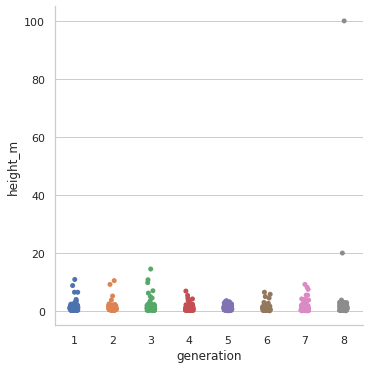

In [56]:
sns.catplot(x='generation', y='height_m', data=pokedex);

Podemos ver 2 valores atípicos en la octava generación. Trazaremos nuevamente el gráfico sin los valores atípicos.

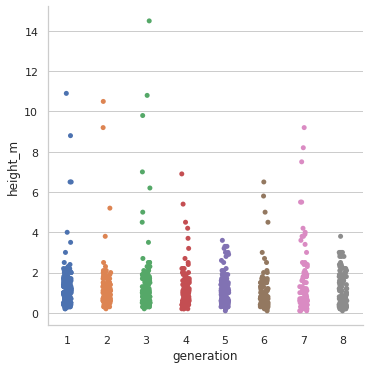

In [57]:
pok_height_out = pokedex[pokedex.height_m < 20]
sns.catplot(x='generation', y='height_m', data=pok_height_out)

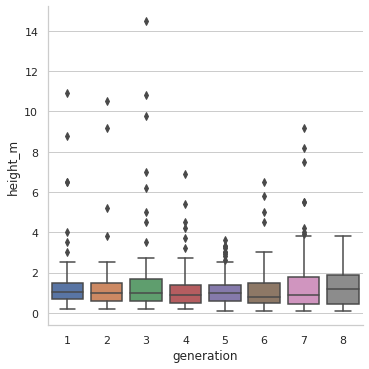

In [58]:
sns.catplot(x='generation', y='height_m', kind='box', data=pok_height_out)

In [59]:
pokedex.height_m.mean()

1.374066985645932

Podemos ver que la mayoría de Pokémon no superan los 3 o 4 metros, con una media sólida en torno a los 1,4 m.

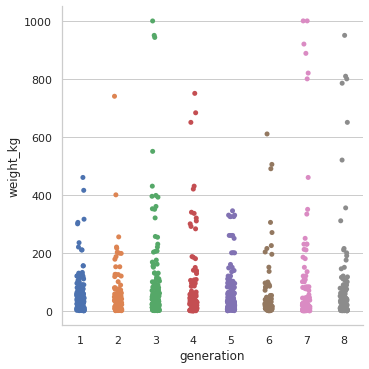

In [60]:
sns.catplot(x='generation', y='weight_kg', data=pokedex)

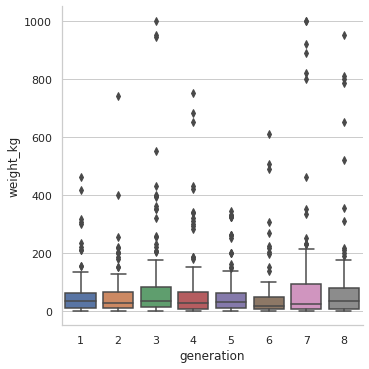

In [61]:
sns.catplot(x='generation', y='weight_kg', kind='box', data=pokedex)

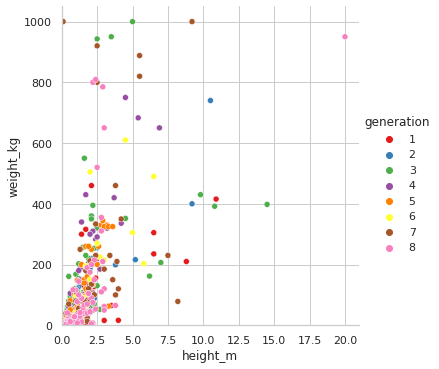

In [62]:
ax = sns.relplot(x='height_m', y='weight_kg', hue='generation', legend='full',palette='Set1', data=pokedex)
ax.set(xlim=(0, None), ylim=(0, None))

# Analizando las estadísticas base

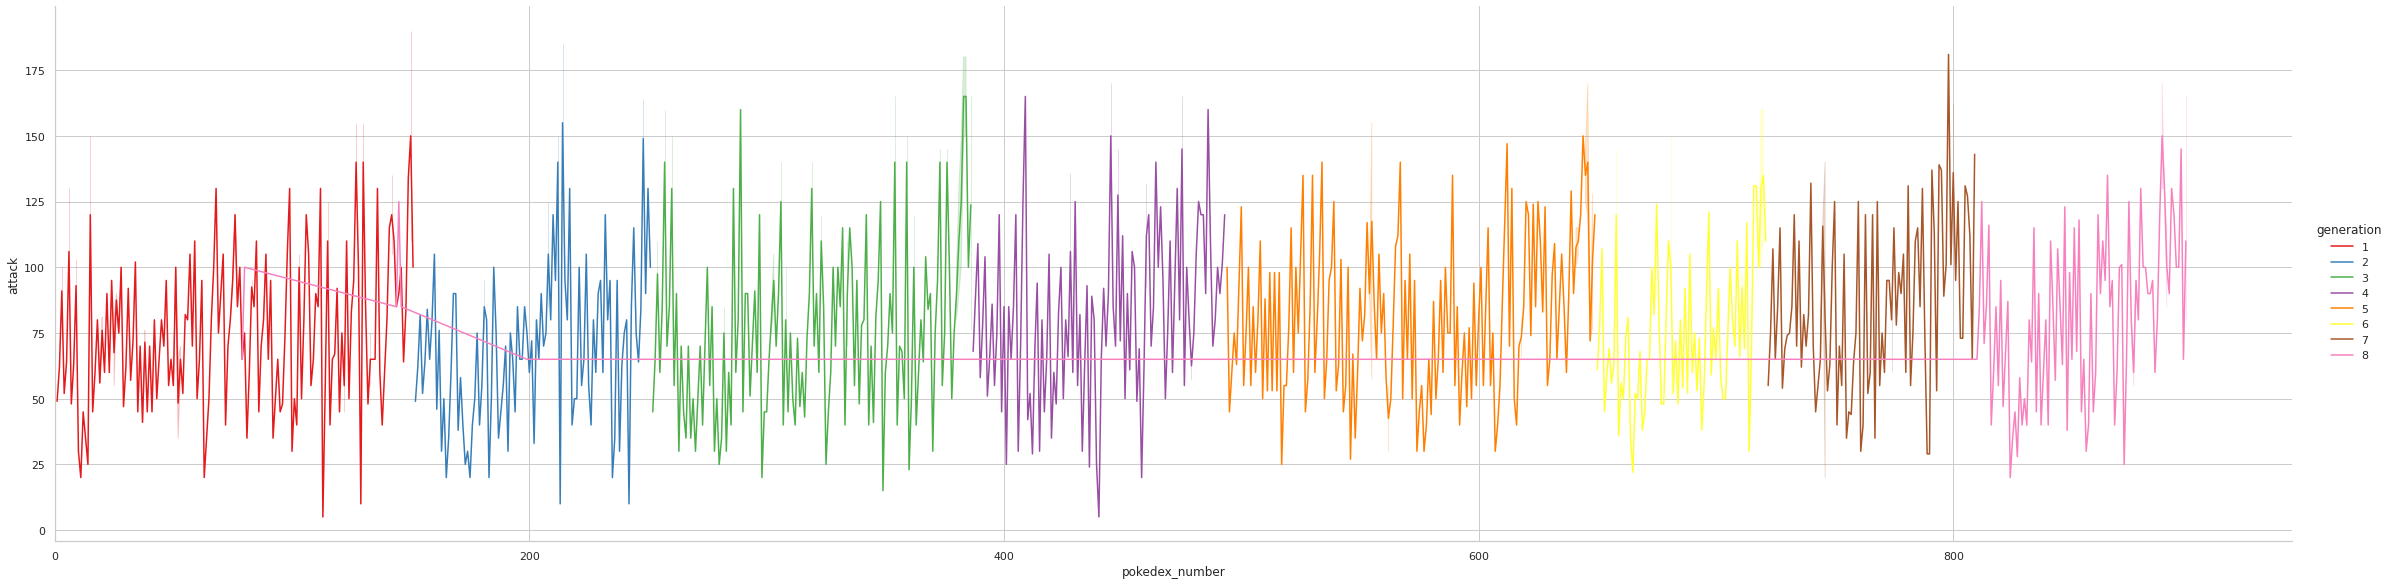

In [63]:
sns.set_style('whitegrid')
g = sns.relplot(x='pokedex_number', y='attack', kind="line", hue = 'generation', palette='Set1', height = 8, aspect = 4, data=pokedex)
g.set(xlim=(0, None))

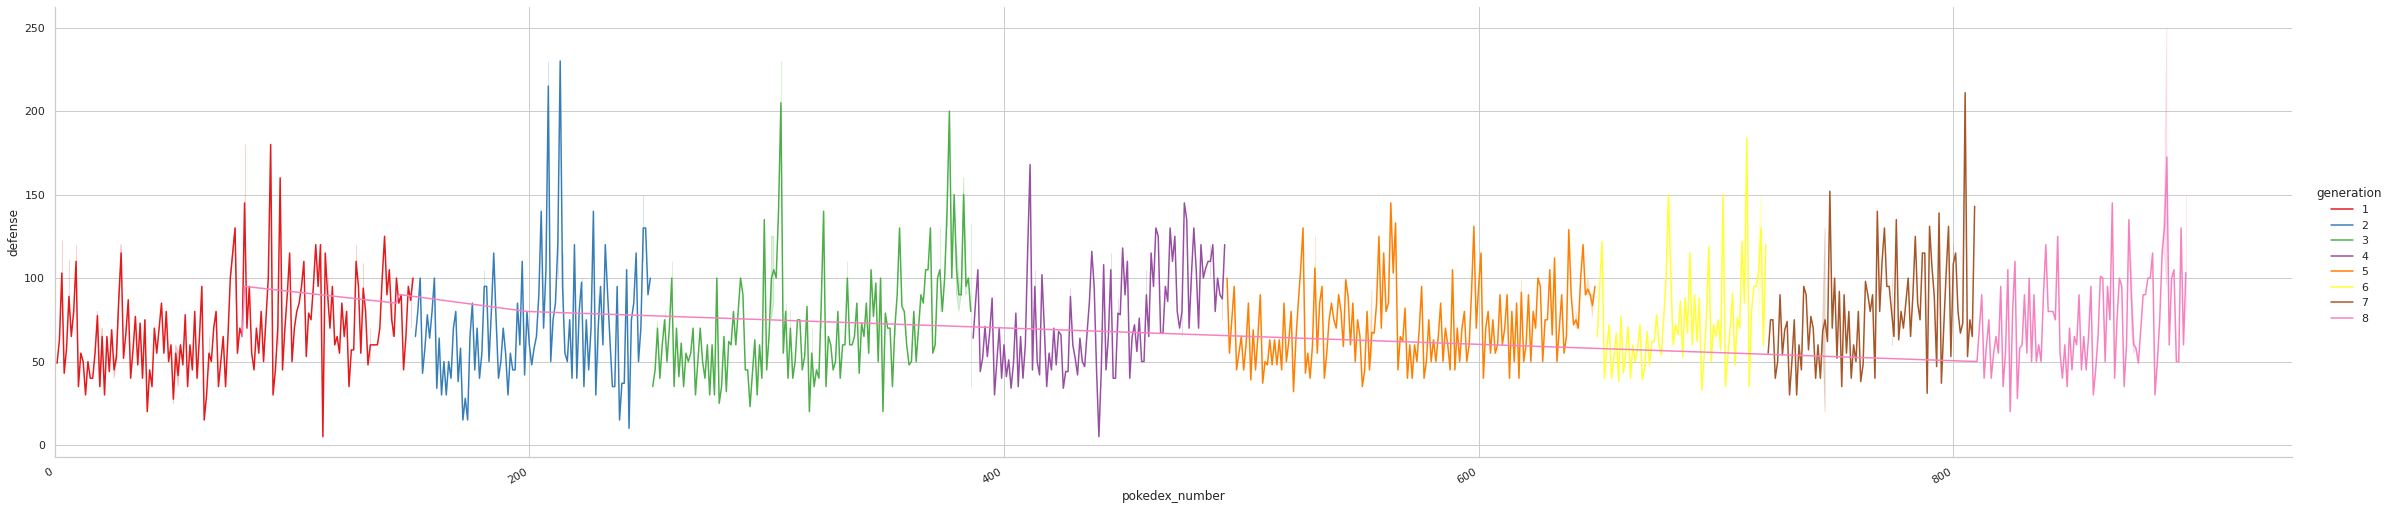

In [65]:
g = sns.relplot(x='pokedex_number', y='defense', kind="line", hue = 'generation', palette='Set1', height = 8, aspect = 4, data=pokedex)
g.set(xlim=(0, None))
g.fig.autofmt_xdate()

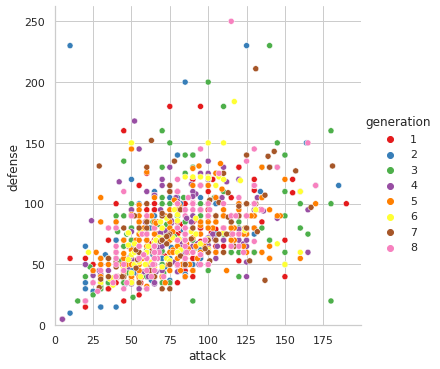

In [69]:
ax = sns.relplot(x='attack', y='defense', hue='generation', legend='full',palette='Set1', data=pokedex)
ax.set(xlim=(0, None), ylim=(0, None))

In [71]:
pokemon_height = pokedex.groupby('name')['height_m'].sum().reset_index().sort_values('height_m',ascending =False)
fig = px.bar(pokemon_height[:50], y='height_m', x='name', color='height_m', height=600)
fig.update_layout(title='Top 50 Pokemon por su altura')
fig.show()

In [73]:
pokemon_weight = pokedex.groupby('name')['weight_kg'].sum().reset_index().sort_values('weight_kg',ascending =False)
fig = px.bar(pokemon_weight[:50], y='weight_kg', x='name', color='weight_kg', height=600)
fig.update_layout(title='Top 50 Pokemon por su peso')
fig.show()

In [83]:
def find_min_and_max(column_name):
    '''
    Get pokemon name according to its max and min attribute: column_name
    column_name: list of str
    '''
    
    # Find max
    max_index = pokedex[column_name].idxmax()
    max_pokemon = pokedex.loc[max_index, 'name']
    
    # Find min
    min_index = pokedex[column_name].idxmin()
    min_pokemon = pokedex.loc[min_index, 'name']
    
    print(f'Pokemon with min {column_name}: {min_pokemon}\nPokemon with max {column_name}: {max_pokemon}\n')
    return max_index, min_index

In [84]:
columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed', 'catch_rate']
min_dict = {}
max_dict = {}
min_pok = {}
max_pok = {}

for colm in columns:
    max_index, min_index = find_min_and_max(colm)
    max_dict[colm] = pokedex.loc[max_index, colm]
    min_dict[colm] = pokedex.loc[min_index, colm]
    max_pok[colm] = pokedex.loc[max_index, 'name']
    min_pok[colm] = pokedex.loc[min_index, 'name']

Pokemon with min attack: Chansey
Pokemon with max attack: Mega Mewtwo X

Pokemon with min defense: Chansey
Pokemon with max defense: Eternatus Eternamax

Pokemon with min sp_attack: Alolan Sandshrew
Pokemon with max sp_attack: Mega Mewtwo Y

Pokemon with min sp_defense: Caterpie
Pokemon with max sp_defense: Eternatus Eternamax

Pokemon with min hp: Shedinja
Pokemon with max hp: Blissey

Pokemon with min speed: Shuckle
Pokemon with max speed: Regieleki

Pokemon with min catch_rate: Articuno
Pokemon with max catch_rate: Caterpie



In [99]:
for colm in ['weight_kg', 'height_m', 'speed']:
    find_min_and_max(colm)

Pokemon with min weight_kg: Gastly
Pokemon with max weight_kg: Cosmoem

Pokemon with min height_m: Joltik
Pokemon with max height_m: Eternatus Eternamax

Pokemon with min speed: Shuckle
Pokemon with max speed: Regieleki



In [85]:
graph_1 = pokedex.groupby('type_1').count().sort_values(by = 'name')
index_graph_1 = pokedex.groupby('type_1').count().index

graph_2 = pokedex.groupby('type_2').count().sort_values(by = 'name')
index_graph_2 = pokedex.groupby('type_2').count().index

In [88]:
fig = go.Figure(
    data=[go.Bar(x = index_graph_1, 
                 y=graph_1['name'])],
    layout_title_text="First type distribution",
)

fig.show()

In [89]:
fig = go.Figure(
    data=[go.Bar(x = index_graph_2, 
                 y=graph_2['name'],
                 marker_color = 'mediumpurple')],
    layout_title_text="Second type distribution"
)

fig.show()

# Gráficos de radar

In [90]:
# Select data
columns = ['attack', 'hp', 'defense', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'speed']
df = pokedex[columns].copy()

# Normalize data for better readability
normalized_df=(df-df.min())/(df.max()-df.min())

In [91]:
def radar_chart(pokemon_1_index, pokemon_2_index):
    '''
    Print radarchart of two pokemons
    pokemon_1_index: int, index of pokemon in 'normalized_df'
    pokemon_2_index: int, index of pokemon in 'normalized_df'
    '''
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=normalized_df.loc[pokemon_1_index,:].tolist(),
          theta=columns,
          fill='toself',
          name=pokemon.loc[pokemon_1_index,'name']
    ))
    
    fig.add_trace(go.Scatterpolar(
          r=normalized_df.loc[pokemon_2_index,:].tolist(),
          theta=columns,
          fill='toself',
          name=pokemon.loc[pokemon_2_index,'name']
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.update_layout(
        title="Radar Chart: "+pokemon.loc[pokemon_1_index,'name']+" VS "+pokemon.loc[pokemon_2_index,'name'])
    
    fig.show()

In [98]:
radar_chart(pokemon_1_index = 170, pokemon_2_index = 325)